In [7]:
import numpy as np, matplotlib.pyplot as plt, scipy.stats, xarray as xr
from HoloCluster import *
plt.rc('text', usetex=True)
from numpy import matlib

In [42]:
shapes = [10, 20, 30]
scales = [0.6, 0.5, 0.4]

Gs = [stats.gamma(shape, 6, scale ) for shape, scale in zip(shapes, scales)]
Ds = [G.rvs(size=1000) for G in Gs]

[[<matplotlib.lines.Line2D at 0x7f75dffd5db0>],

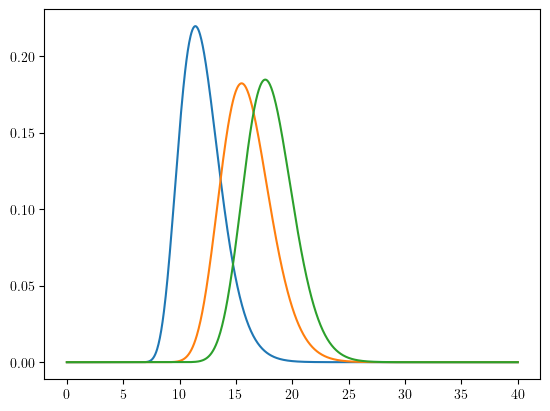

In [43]:
x = np.linspace(0, 40, 1000)
[plt.plot(x, G.pdf(x)) for G in Gs]

(0.0, 55.0)

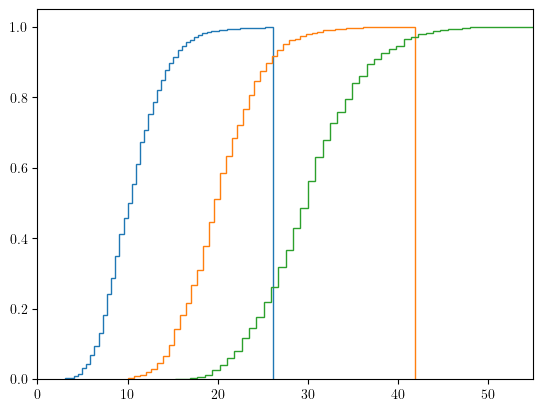

In [4]:
[plt.hist(D, bins=50, histtype='step', cumulative=True, density=True) for D in Ds]
plt.xlim(0, 55)



In [8]:
n = 50
loc = 6
SD1 = np.array([np.histogram(stats.gamma(10, scale=0.6, loc=loc).rvs(1000), 
                             bins=np.arange(0, 60, 1))[0] for t in range(n)])
SD2 = np.array([np.histogram(stats.gamma(20, scale=0.5, loc=loc).rvs(1000), 
                             bins=np.arange(0, 60, 1))[0] for t in range(n)])
SD3 = np.array([np.histogram(stats.gamma(30, scale=0.4, loc=loc).rvs(1000), 
                             bins=np.arange(0, 60, 1))[0] for t in range(n)])

noise = np.array([np.histogram(stats.gamma(np.random.randint(5, 60), 
                                           scale=np.random.uniform(low=0.3, high=0.9), 
                                           loc=loc).rvs(1000), 
                             bins=np.arange(0, 60, 1))[0] for t in range(n)])

np.random.seed(13)
SD = np.concatenate([SD1, SD2, SD3, noise])
np.random.shuffle(SD)

In [9]:
DS = xr.Dataset(data_vars = dict(
        Water_PSDnoNorm=(['time', 'diameter'], SD), 
        Water_totalCount=(['time'], np.zeros(n*4) + 1000),
        Total_volume=(['time'], np.zeros(n*4)+7.377*10**(-5))),
    coords=dict(
        time=np.arange(n*4),
        diameter=np.arange(59) / 1000000,
        ))

In [12]:
FIT = HoloCluster(DS, n_jobs=10)
NOFIT = HoloCluster(DS, n_jobs=10)

Dataset already on datetime format
Dataset already on datetime format


In [14]:
import warnings
warnings.filterwarnings('ignore')
FIT.compute_KS(n_jobs=10, fit_method='each', ensemble_members=10, binary=True)
NOFIT.compute_KS(n_jobs=10, fit_method='none', ensemble_members=10, binary=False)

Generating ensemble members


  0%|          | 0/200 [00:00<?, ?it/s]

Computing KS matrix


  0%|          | 0/200 [00:00<?, ?it/s]

Generating ensemble members


  0%|          | 0/200 [00:00<?, ?it/s]

Computing KS matrix


  0%|          | 0/200 [00:00<?, ?it/s]

/nird/projects/NS9600K/brittsc/WRF_output_Stian/HoloAnalysis/HoloCluster.py:318: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_result = stats.ks_2samp(primary_member, secondary_member, method=method)
/nird/projects/NS9600K/brittsc/WRF_output_Stian/HoloAnalysis/HoloCluster.py:318: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_result = stats.ks_2samp(primary_member, secondary_member, method=method)
/nird/projects/NS9600K/brittsc/WRF_output_Stian/HoloAnalysis/HoloCluster.py:318: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_result = stats.ks_2samp(primary_member, secondary_member, method=method)
/nird/projects/NS9600K/brittsc/WRF_output_Stian/HoloAnalysis/HoloCluster.py:318: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_result = stats.ks_2samp(primary_member, secondary_member, method=method)
/nird/projects/NS9600K/b

Found 3 classes with min_cluster_size=30 and min_samples=25
Class 0: 52 | Class 1: 52 | Class 2: 51 
Noise occurence: 22.50%


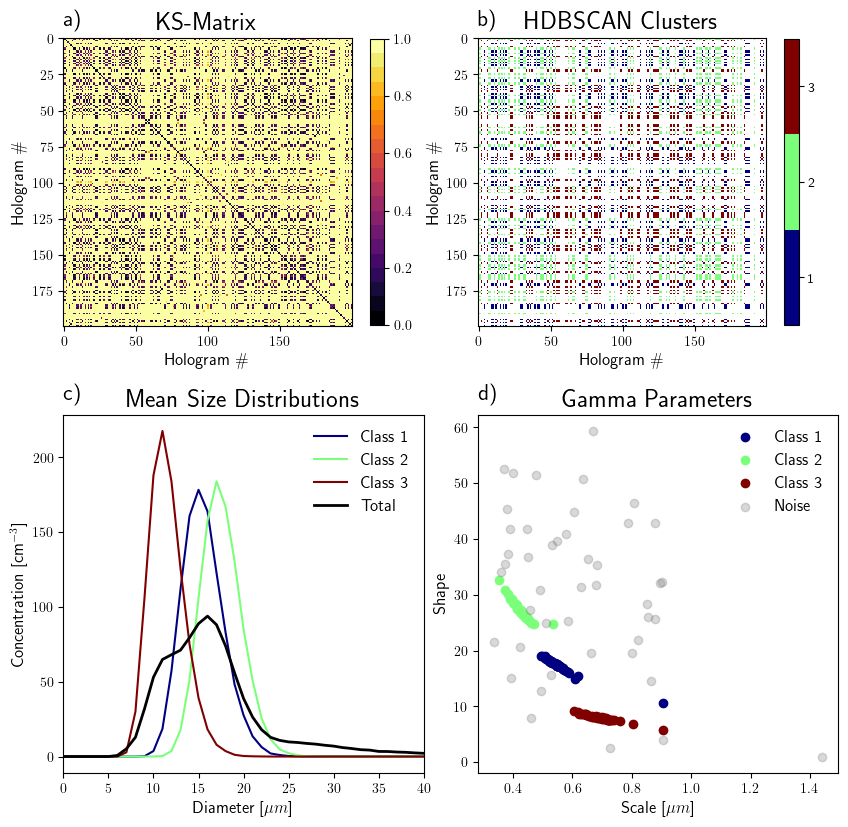

In [34]:
pct = 0.1
#T.cluster(algorithm='hdbscan', min_cluster_size=int(n*4*pct), min_samples=5, #int(n*4*pct),
#          cluster_selection_method='eom')#, eps=0.1)
FIT.cluster(algorithm='hdbscan', min_cluster_size=30, min_samples=25)

FIT.plot_summary(xlim=(0,40), exclude_noise=False)


Found 3 classes with min_cluster_size=25 and min_samples=25
Class 0: 53 | Class 1: 57 | Class 2: 54 
Noise occurence: 18.00%


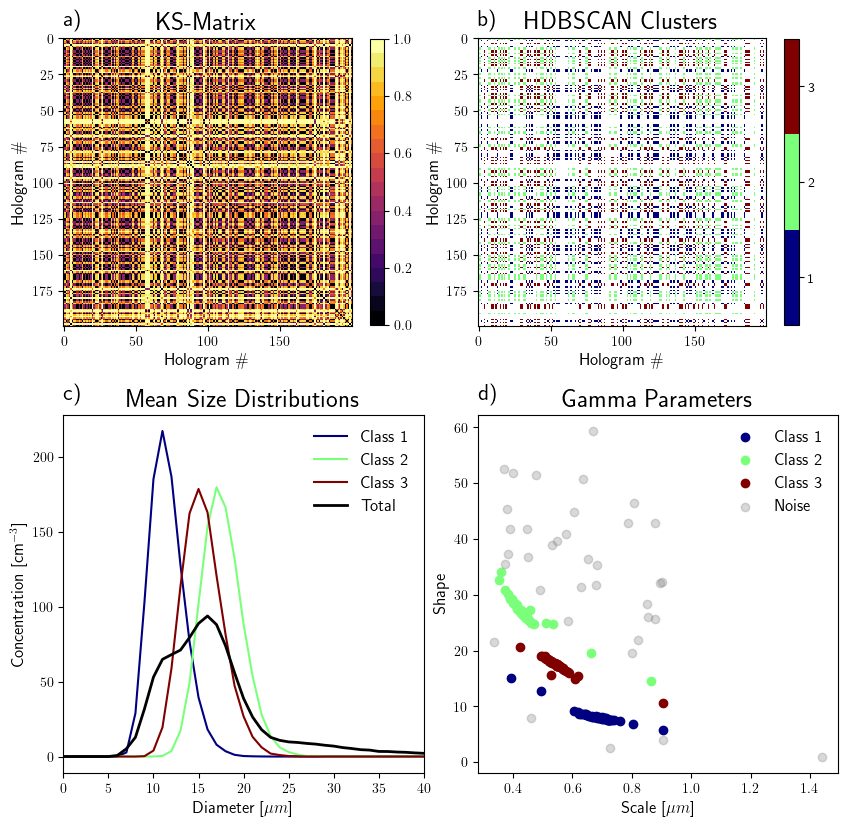

In [36]:
NOFIT.cluster(algorithm='hdbscan', min_cluster_size=25, min_samples=25)

NOFIT.plot_summary(xlim=(0,40), exclude_noise=False)

In [13]:
0.04 * 200

8.0